## Step 1: Importing Libraries

In [1]:
#importing necessary libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

#supressing warnings:

import warnings
warnings.filterwarnings("ignore")

## Step 2: Reading and understanding Data

In [2]:
#reading data:

df = pd.read_csv("day.csv")

In [3]:
#looking at the head of the data:

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#shape of the data:

df.shape

(730, 16)

`Number of records = 730, Number of attributes = 16.`

In [5]:
#info of the data:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#checking null values:

df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

`There are no null values present in the data set.`

In [7]:
#checking some statistical aspects of the data:

round(df.describe(),3)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000,730.000,730.0,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000
mean,365.500,2.499,0.5,6.526,0.029,2.996,0.690,1.395,20.319,23.726,62.765,12.764,849.249,3658.758,4508.007
std,210.877,1.110,0.5,3.450,0.167,2.000,0.463,0.545,7.507,8.150,14.238,5.196,686.480,1559.759,1936.012
min,1.000,1.000,0.0,1.000,0.000,0.000,0.000,1.000,2.424,3.953,0.000,1.500,2.000,20.000,22.000
25%,183.250,2.000,0.0,4.000,0.000,1.000,0.000,1.000,13.812,16.890,52.000,9.042,316.250,2502.250,3169.750
50%,365.500,3.000,0.5,7.000,0.000,3.000,1.000,1.000,20.466,24.368,62.625,12.125,717.000,3664.500,4548.500
75%,547.750,3.000,1.0,10.000,0.000,5.000,1.000,2.000,26.881,30.446,72.990,15.626,1096.500,4783.250,5966.000
max,730.000,4.000,1.0,12.000,1.000,6.000,1.000,3.000,35.328,42.045,97.250,34.000,3410.000,6946.000,8714.000


In [8]:
#checking if there are any duplicate records:

df.drop_duplicates(inplace=True)
df.shape

(730, 16)

`Shape is same before and after drop_duplicates means there are no duplicate records.`

In [9]:
#dropping unwanted attributes:
#instant column contains only indexes,in place of dteday month and yr can be used and cnt columns contains sum of both casusal and registered.

df.drop(["instant","dteday","casual","registered"],axis=1,inplace=True)

In [10]:
#Converting some colummns to categorical columns:

df["season"] = df["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df["mnth"] = df["mnth"].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df["weekday"] = df["weekday"].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df["weathersit"] = df["weathersit"].map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})

#checking head of the data:

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data


In [11]:
#seperating continuous and categorical columns:

num_cols = ["temp","atemp","hum","windspeed","cnt"]
cat_cols = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

<Figure size 1080x2160 with 0 Axes>

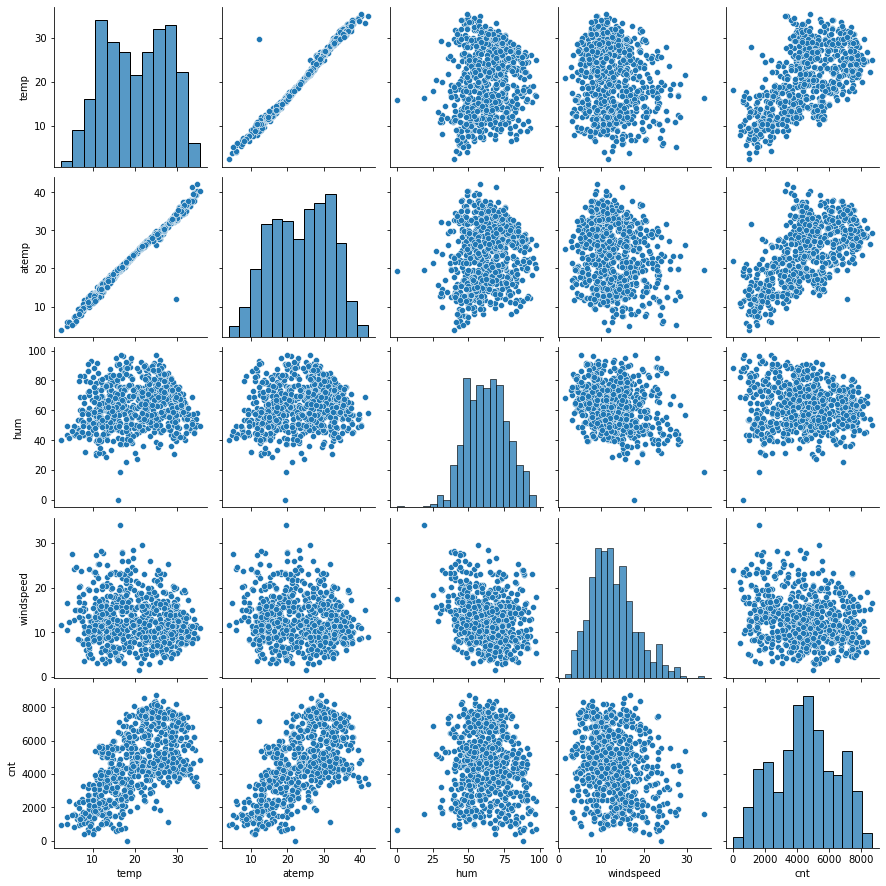

In [12]:
#plotting scatterplot for target vs continous columns:

plt.figure(figsize = (15,30))
sns.pairplot(df[num_cols])
plt.show()

`'temp' and 'atemp' seems to have a postive linear relation with the target variable 'cnt'.`

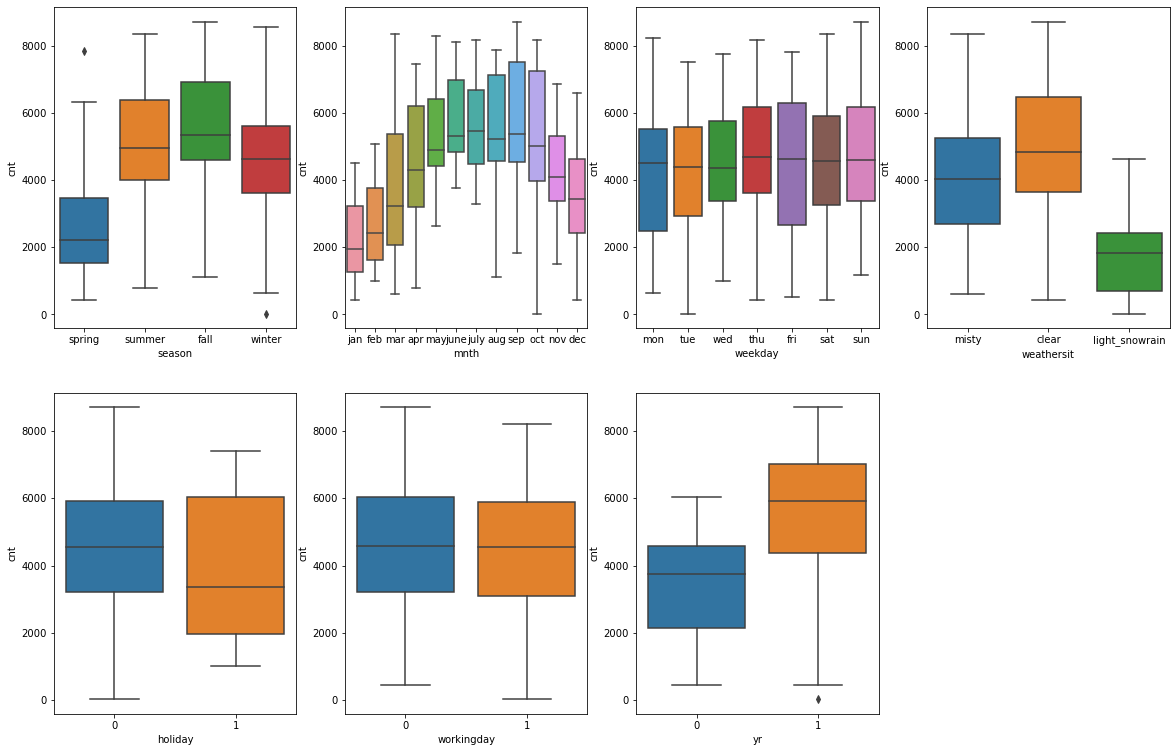

In [13]:
#plotting the box plot for target vs categorical columns:

plt.figure(figsize=(20, 13))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)

plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)

plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)

plt.show()

Observation:
- Season-wise Fall season have the highest demand.
- In the Month-wise category Sept seems to be the highest out of all the months.
- On the day when the weather is clear seems to be the most favourable day for bike sharing.
- Clearly on the holiday the demand is decreased for bike rentals it may be because people may want to spend time at home and enjoy with family.
- Year-wise trend shows a clear growth in demand from the yr- 2018 to yr- 2019.
- Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year.

In [14]:
#Checking the correlation between numerical variables:

round(df[num_cols].corr(),3)

,temp,atemp,hum,windspeed,cnt
temp,1.000,0.992,0.129,-0.158,0.627
atemp,0.992,1.000,0.142,-0.184,0.631
hum,0.129,0.142,1.000,-0.249,-0.099
windspeed,-0.158,-0.184,-0.249,1.000,-0.235
cnt,0.627,0.631,-0.099,-0.235,1.000


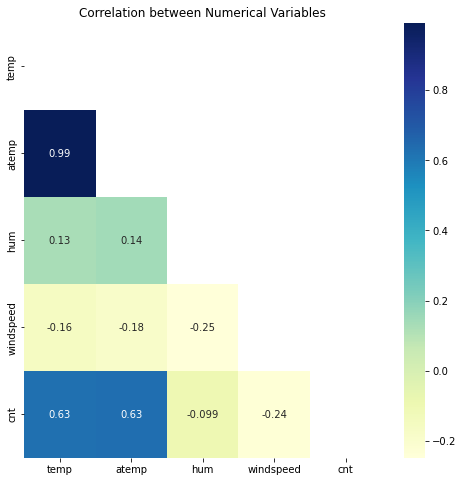

In [15]:
#plotting heatmap for better readability:

plt.figure(figsize = (8,8))
df_corr = np.triu(df[num_cols].corr())
sns.heatmap(df[num_cols].corr(), annot = True, cmap="YlGnBu", mask=df_corr)
plt.title("Correlation between Numerical Variables")
plt.show()

`There is strong linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value.`

## Step 3: Data Preprocessing

In [16]:
#creating dummy variables for mnth, weekday, weathersit and season variables:

months     = pd.get_dummies(df.mnth,drop_first=True)
weekdays   = pd.get_dummies(df.weekday,drop_first=True)
weathersit = pd.get_dummies(df.weathersit,drop_first=True)
seasons    = pd.get_dummies(df.season,drop_first=True)

#concating the original dataframe with the dummy variable dataframe:

df_new = pd.concat([df, months, weekdays, weathersit, seasons], axis=1)

#dropping original columns as it is not needed in model building process:

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

#Checking head of the new dataframe:

df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the dataset into Test & Train Dataset 


In [17]:
#splitting the dataset using sklearn library:

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, test_size = 0.3, random_state = 1000)

In [18]:
#cheching head and shape of train dataset:

print("Shape of the train data:",df_train.shape)
df_train.head()


Shape of the train data: (510, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
544,1,0,0,34.200847,39.33065,48.8750,11.082939,5463,0,0,...,1,0,0,0,0,0,0,0,0,0
674,1,0,1,11.514153,14.07835,56.7083,11.625371,5686,0,0,...,0,0,0,0,1,0,0,0,0,1
477,1,0,1,13.188347,15.05625,76.6667,20.334232,3214,0,0,...,0,0,0,1,0,0,1,0,1,0
176,0,0,1,27.880000,31.88145,51.3333,6.333731,5305,0,0,...,0,0,0,1,0,0,0,0,0,0
655,1,0,1,21.422500,25.63125,72.8333,15.874779,7509,0,0,...,0,0,0,0,0,0,1,0,0,1


In [19]:
#rescaling the features using MinMaxScaler to normalize the data:

scaler = MinMaxScaler()

#normalizing all the countinuous variables:

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

#checking head of the data:

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
544,1,0,0,0.964059,0.926848,0.503649,0.294854,0.625978,0,0,...,1,0,0,0,0,0,0,0,0,0
674,1,0,1,0.240884,0.246245,0.584370,0.311545,0.651634,0,0,...,0,0,0,0,1,0,0,0,0,1
477,1,0,1,0.294252,0.272602,0.790039,0.579511,0.367234,0,0,...,0,0,0,1,0,0,1,0,1,0
176,0,0,1,0.762572,0.726076,0.528982,0.148724,0.607800,0,0,...,0,0,0,1,0,0,0,0,0,0
655,1,0,1,0.556729,0.557620,0.750536,0.442296,0.861367,0,0,...,0,0,0,0,0,0,1,0,0,1


In [20]:
#describing the data:

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.500000,0.025490,0.682353,0.522749,0.507177,0.650813,0.347478,0.514357,0.082353,0.080392,...,0.149020,0.147059,0.131373,0.145098,0.141176,0.027451,0.347059,0.24902,0.266667,0.233333
std,0.500491,0.157763,0.466018,0.239351,0.219530,0.145303,0.161325,0.220019,0.275172,0.272166,...,0.356457,0.354512,0.338139,0.352545,0.348545,0.163554,0.476502,0.43287,0.442651,0.423368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.318212,0.323000,0.540738,0.232053,0.367234,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.522966,0.518051,0.655431,0.328844,0.513921,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732894,0.690137,0.754508,0.435596,0.676542,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


`All the columns now have (0,1) as (min,max) values.`

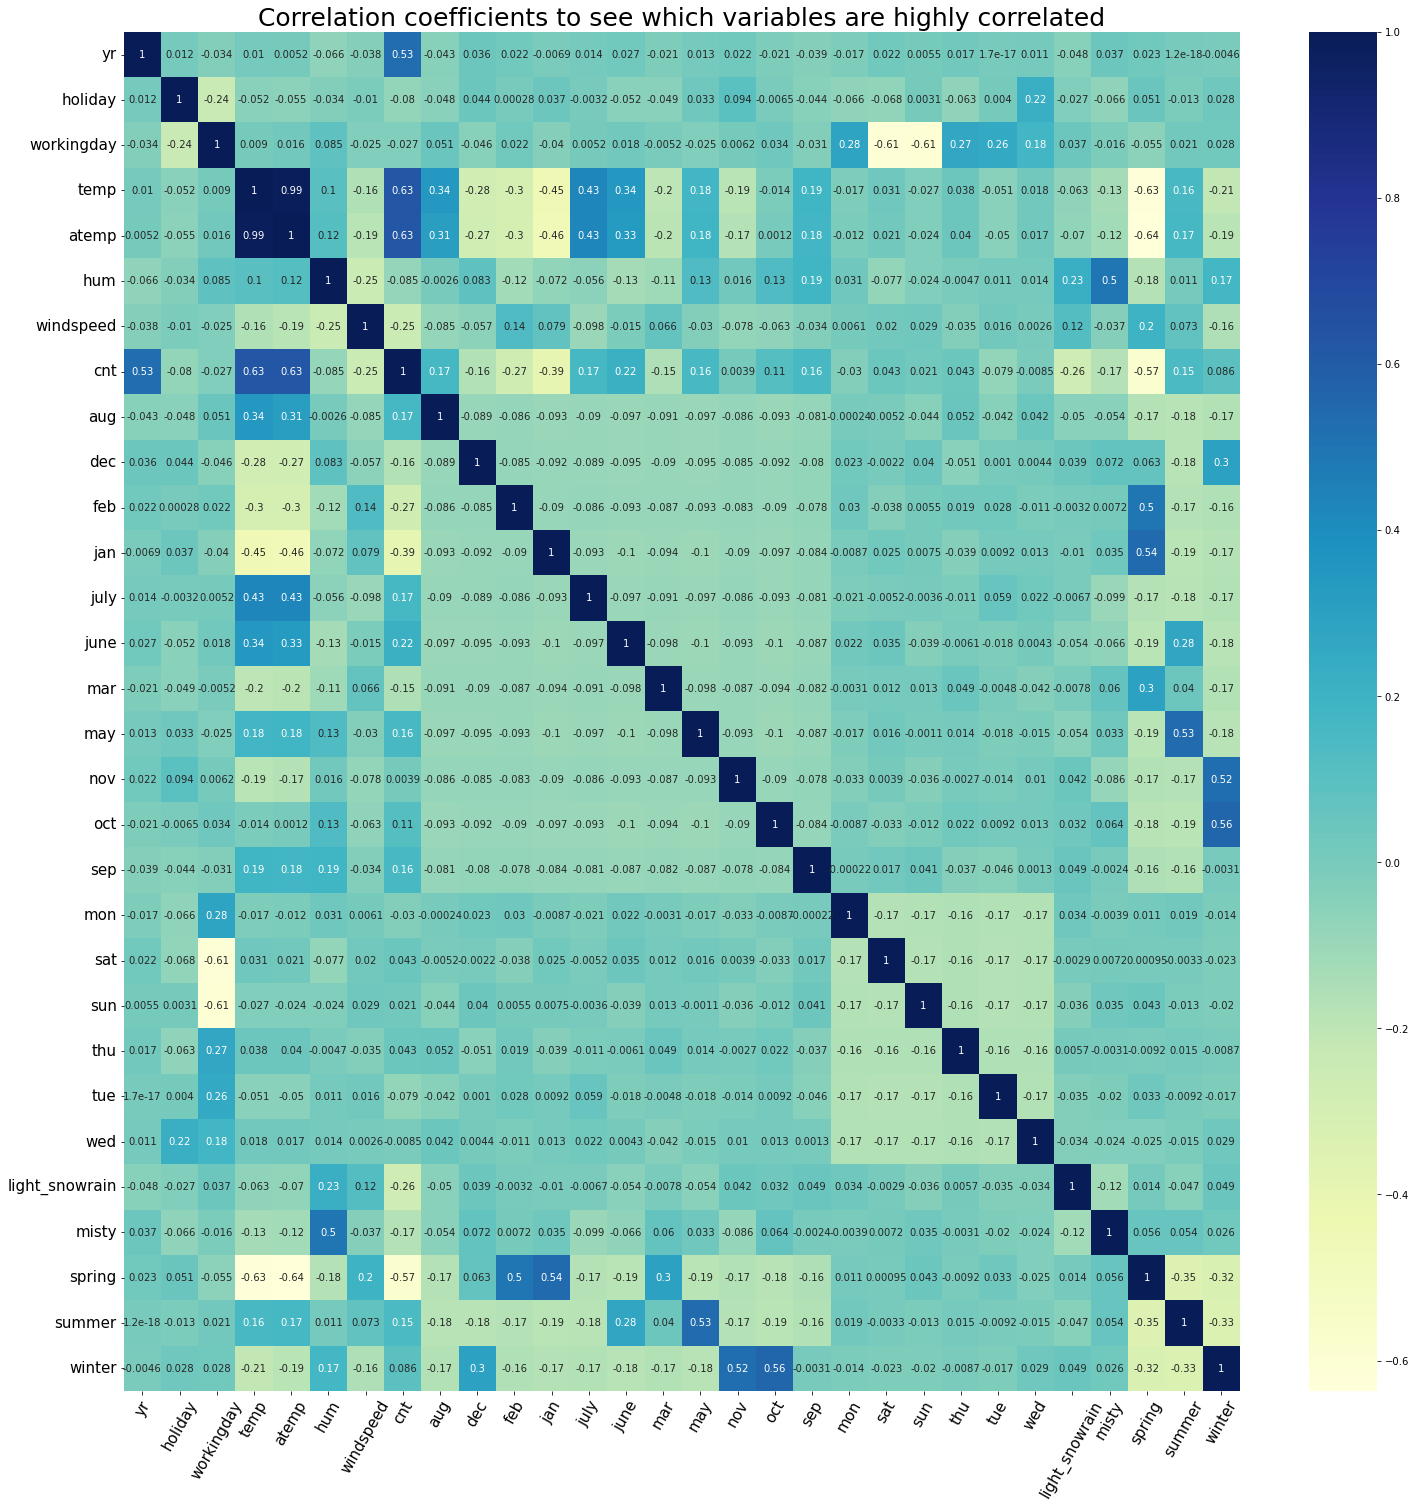

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation coefficients to see which variables are highly correlated",fontsize=25)
plt.xticks(rotation = 60, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

Target variable `cnt` follows:
- Strong positive correlation with  variables `yr` & `temp`.
- Negative correlation with month `jan` & `feb` and season `spring`. 

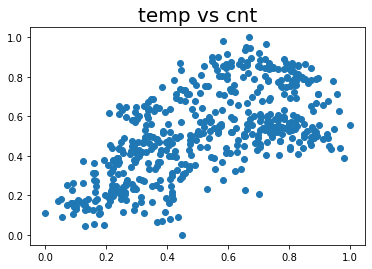

In [22]:
#lets try visualizing them:

plt.scatter(df_train.temp, df_train.cnt)
plt.title("temp vs cnt", fontsize = 20)
plt.show()

## Step 5: Building a linear regression model 

In [23]:
#splitting the df_train in X,y sets:

y_train = df_train.pop('cnt')
X_train = df_train

In [24]:
#using the RFE(recursive feature elimination) for initial feature selection:

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

#Checking the list of all 15 features:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 5),
 ('jan', False, 4),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 12),
 ('may', False, 3),
 ('nov', False, 2),
 ('oct', False, 8),
 ('sep', True, 1),
 ('mon', False, 13),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 9),
 ('light_snowrain', True, 1),
 ('misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1)]

In [25]:
#Checking the feature names that got selected:

features = X_train.columns[rfe.support_]
print(features)

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'dec', 'july',
       'sep', 'sat', 'sun', 'light_snowrain', 'misty', 'spring', 'winter'],
      dtype='object')


In [26]:
#creating a function to calculate VIF(Variance Inflation Factor):

def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [27]:
#Updating the X_train with RFE selected columns:

X_train_rfe = X_train[features]

### Building 1st model:

In [28]:
#Adding a constant as it is neccesary in case of statsmodel :

X_train_lm = sm.add_constant(X_train_rfe)

#Fitting the model:

lr_1 = sm.OLS(y_train, X_train_lm).fit()

#Checking the summary of the models:

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.0
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          2.59e-181
Time:                        11:36:42   Log-Likelihood:                 506.36
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     494   BIC:                            -913.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2625      0.043      6.

In [29]:
#Checking VIF:
VIF(X_train_rfe)

,Features,VIF
3,atemp,326.90
2,temp,307.07
4,hum,29.55
1,workingday,19.36
5,windspeed,5.87
10,sun,4.92
9,sat,4.87
13,spring,2.92
12,misty,2.32
14,winter,2.20


We need to drop the `atemp` because it is insignificant(high p-value) and highly correlated(high VIF value).

In [30]:
#dropping atemp column:

X_train_new = X_train_rfe.drop("atemp", axis = 1)

#checking head of the data:

X_train_new.head()

,yr,workingday,temp,hum,windspeed,dec,july,sep,sat,sun,light_snowrain,misty,spring,winter
544,1,0,0.964059,0.503649,0.294854,0,0,0,1,0,0,0,0,0
674,1,1,0.240884,0.584370,0.311545,0,0,0,0,0,0,0,0,1
477,1,1,0.294252,0.790039,0.579511,0,0,0,0,0,0,1,0,0
176,0,1,0.762572,0.528982,0.148724,0,0,0,0,0,0,0,0,0
655,1,1,0.556729,0.750536,0.442296,0,0,0,0,0,0,1,0,1


### Building 2nd model:

In [31]:
#Add a constant:

X_train_lm = sm.add_constant(X_train_new)

#Fitting the model:

lr_2 = sm.OLS(y_train, X_train_lm).fit()

#Checking the summary:

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.9
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          2.52e-182
Time:                        11:36:42   Log-Likelihood:                 506.08
No. Observations:                 510   AIC:                            -982.2
Df Residuals:                     495   BIC:                            -918.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2652      0.043      6.

In [32]:
#Checking the VIF:

VIF(X_train_new)

,Features,VIF
3,hum,29.06
1,workingday,19.09
2,temp,15.25
4,windspeed,5.78
9,sun,4.86
8,sat,4.84
12,spring,2.92
11,misty,2.32
13,winter,2.16
0,yr,2.00


We need to drop the `hum` as it is highly correlated(high VIF value).

In [33]:
#Dropping the column hum:

X_train_new = X_train_new.drop("hum", axis = 1)

#Checking the head of the data:

X_train_new.head()

,yr,workingday,temp,windspeed,dec,july,sep,sat,sun,light_snowrain,misty,spring,winter
544,1,0,0.964059,0.294854,0,0,0,1,0,0,0,0,0
674,1,1,0.240884,0.311545,0,0,0,0,0,0,0,0,1
477,1,1,0.294252,0.579511,0,0,0,0,0,0,1,0,0
176,0,1,0.762572,0.148724,0,0,0,0,0,0,0,0,0
655,1,1,0.556729,0.442296,0,0,0,0,0,0,1,0,1


### Building 3rd model:

In [34]:
#add the constant:

X_train_lm = sm.add_constant(X_train_new)

#fitting the model:

lr_3 = sm.OLS(y_train, X_train_lm).fit()

#Checking the summary of the model:

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.1
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          9.29e-180
Time:                        11:36:42   Log-Likelihood:                 497.24
No. Observations:                 510   AIC:                            -966.5
Df Residuals:                     496   BIC:                            -907.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1699      0.037      4.

In [35]:
#Checking the VIF values:

VIF(X_train_new)

,Features,VIF
1,workingday,13.86
2,temp,11.72
3,windspeed,5.73
7,sat,3.95
8,sun,3.86
11,spring,2.65
0,yr,1.99
12,winter,1.91
10,misty,1.59
5,july,1.40


We need to drop the `workingday` as it is highly correlated(high VIF value).

In [36]:
#dropping the workingday column:

X_train_new = X_train_new.drop("workingday", axis = 1)

#Checking the head of the data:

X_train_new.head()

,yr,temp,windspeed,dec,july,sep,sat,sun,light_snowrain,misty,spring,winter
544,1,0.964059,0.294854,0,0,0,1,0,0,0,0,0
674,1,0.240884,0.311545,0,0,0,0,0,0,0,0,1
477,1,0.294252,0.579511,0,0,0,0,0,0,1,0,0
176,0,0.762572,0.148724,0,0,0,0,0,0,0,0,0
655,1,0.556729,0.442296,0,0,0,0,0,0,1,0,1


### Building 4th model: 

In [37]:
#add constant:

X_train_lm = sm.add_constant(X_train_new)

#fitting the model:

lr_4 = sm.OLS(y_train, X_train_lm).fit()

#checking the summary of the model:

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.2
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          2.14e-178
Time:                        11:36:43   Log-Likelihood:                 491.26
No. Observations:                 510   AIC:                            -956.5
Df Residuals:                     497   BIC:                            -901.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2666      0.024     11.

In [38]:
#Checking the VIF:

VIF(X_train_new)

,Features,VIF
1,temp,4.94
2,windspeed,4.79
0,yr,1.98
10,spring,1.89
9,misty,1.53
11,winter,1.52
4,july,1.38
3,dec,1.25
6,sat,1.22
7,sun,1.22


We need to remove the `sat` feature as it is insignificant(high p-value).

In [39]:
#dropping the sat column:

X_train_new = X_train_new.drop("sat", axis = 1)

#checking the head of the data:

X_train_new.head()

,yr,temp,windspeed,dec,july,sep,sun,light_snowrain,misty,spring,winter
544,1,0.964059,0.294854,0,0,0,0,0,0,0,0
674,1,0.240884,0.311545,0,0,0,0,0,0,0,1
477,1,0.294252,0.579511,0,0,0,0,0,1,0,0
176,0,0.762572,0.148724,0,0,0,0,0,0,0,0
655,1,0.556729,0.442296,0,0,0,0,0,1,0,1


###  Building 5th model:

In [40]:
#add constant:

X_train_lm = sm.add_constant(X_train_new)

#fitting the model:

lr_5 = sm.OLS(y_train, X_train_lm).fit()

#Checking the summary of the model:

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.0
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          4.61e-179
Time:                        11:36:43   Log-Likelihood:                 490.06
No. Observations:                 510   AIC:                            -956.1
Df Residuals:                     498   BIC:                            -905.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2679      0.024     11.

In [41]:
#Checking the VIF:

VIF(X_train_new)

,Features,VIF
1,temp,4.85
2,windspeed,4.78
0,yr,1.98
9,spring,1.88
8,misty,1.53
10,winter,1.52
4,july,1.38
3,dec,1.25
6,sun,1.18
5,sep,1.16


### As we can see that all the p-value are less than 0.05 and VIF values are less than 5. Therefore it seems that all the variables are significant and have low multicollinearity. So we can go ahead and make predictions using this model.

## Step 6: Residual analysis on the train data:

### 1st Assumption:

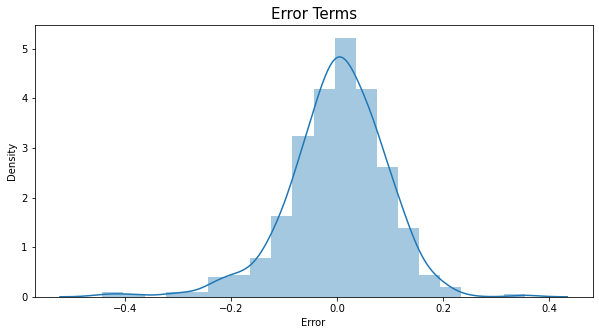

In [42]:
#predicting the target variable on train data using the final model:

y_train_pred = lr_5.predict(X_train_lm)

#Visualizing the residauls:

plt.figure(figsize = (10,5))
sns.distplot((y_train - y_train_pred,), bins = 20)
plt.title("Error Terms", fontsize = 15)
plt.xlabel("Error", fontsize = 10)
plt.show()

Observation:
- As we can see from the histogram Errors are normally distributed.
- Mean of the Error terms is 0.

### 2nd Assumption:


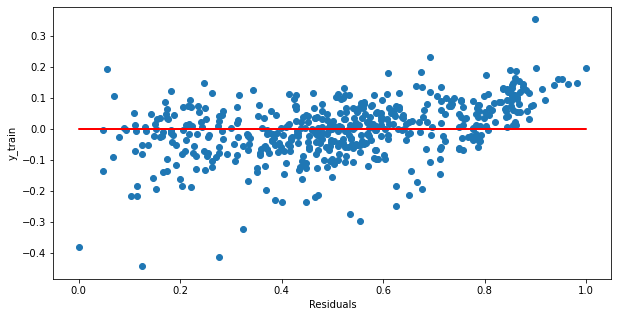

In [43]:
#visualizing the error terms using scatter plot to check if there is any visible pattern:

residuals = (y_train - y_train_pred)

plt.figure(figsize =(10,5))
plt.scatter(y_train,residuals)
plt.plot(y_train,(y_train - y_train), '-r')
plt.ylabel("y_train")
plt.xlabel("Residuals")
plt.show()


Observation:
- As we can see that there are no easily identifiable visible patterns, therefore we can say that error terms are independent of each other.
- Error terms seems to have constant variance(Homoscedasticity).

### 3rd Assumption:

In [44]:
#Checking if there is any multicollinearity between the predictor variables:

VIF(X_train_new)

,Features,VIF
1,temp,4.85
2,windspeed,4.78
0,yr,1.98
9,spring,1.88
8,misty,1.53
10,winter,1.52
4,july,1.38
3,dec,1.25
6,sun,1.18
5,sep,1.16


Obseravtion:
- As we can see that all the VIF values are less than 5 we can say that there is no multicollinearity b/w the predictor variables.

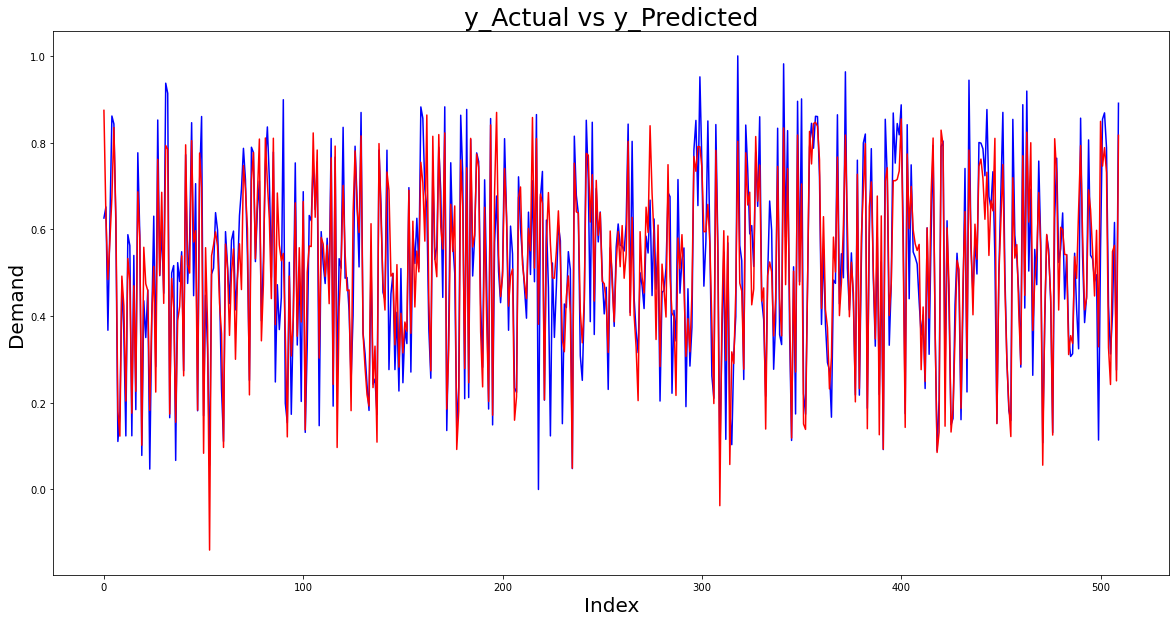

In [45]:
#Checking how the model performs against the training set:

c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize = (20,10))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.title('y_Actual vs y_Predicted', fontsize = 25)
plt.xlabel('Index', fontsize = 20)
plt.ylabel('Demand', fontsize = 20)
plt.show()

Observation:
- As we can see that it performs quite well, it is predicting all the high and low almost accurately.

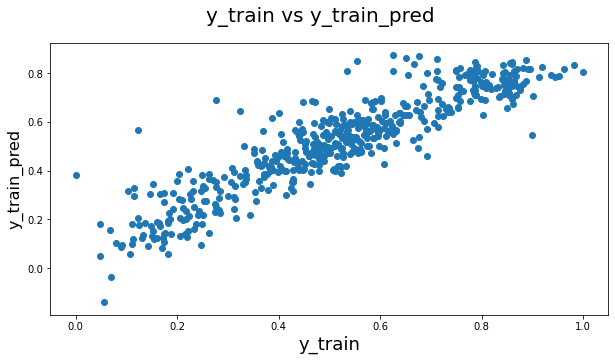

In [46]:
#Visualizing the actual vs predicted values on train data:

fig = plt.figure(figsize = (10,5))
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20) 
plt.xlabel('y_train', fontsize = 18)
plt.ylabel('y_train_pred', fontsize = 16) 
plt.show()


In [47]:
#Checking the R-Squared and adjusted R-Squared value on the actual vs predicted values of the train data set:

r_score_train = round(r2_score(y_train,y_train_pred),4)
print("R-Squared value:",r_score_train)

N = len(X_train_new) 
p = len(X_train_new.columns)
r2_train_adj = round((1-((1-r_score_train)*(N-1)/(N-p-1))),4)
print("adjusted R-Squared value:",r2_train_adj)

R-Squared value: 0.8227
adjusted R-Squared value: 0.8188


## Step 7: Making the prediction using the final model:

In [48]:
#Scaling the test data set:

df_test[num_cols] = scaler.transform(df_test[num_cols])

#Checking the head of the data:

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
310,0,0,1,0.390094,0.407020,0.781880,0.071811,0.461689,0,0,...,0,0,0,0,1,0,0,0,0,1
320,0,0,0,0.320391,0.302378,0.593387,0.583358,0.348711,0,0,...,1,0,0,0,0,0,1,0,0,1
189,0,0,1,0.832275,0.761827,0.627737,0.299998,0.611367,0,0,...,0,0,0,0,0,0,0,0,0,0
382,1,0,1,0.270290,0.237738,0.456848,0.810267,0.385872,0,0,...,0,0,0,0,0,0,0,1,0,0
388,1,0,1,0.321479,0.337264,0.861313,0.208991,0.496664,0,0,...,0,0,1,0,0,0,0,1,0,0


In [49]:
#Describing the data:

df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.036530,0.707763,0.518968,0.504278,0.638058,0.344287,0.519768,0.091324,0.095890,...,0.127854,0.132420,0.168950,0.136986,0.146119,0.031963,0.315068,0.237443,0.219178,0.269406
std,0.501140,0.188034,0.455833,0.240207,0.220975,0.149928,0.157137,0.229815,0.288730,0.295115,...,0.334692,0.339723,0.375566,0.344621,0.354034,0.176306,0.465607,0.426491,0.414637,0.444668
min,0.000000,0.000000,0.000000,-0.048868,-0.026641,0.261915,0.047450,0.069604,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.311133,0.310028,0.521742,0.230151,0.345950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.534946,0.530399,0.621726,0.320521,0.530028,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.721730,0.683135,0.738729,0.433733,0.699896,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.983663,0.950666,1.002146,0.864144,0.959503,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
#dividing the test data set in X and y:

y_test = df_test.pop('cnt')
X_test = df_test

In [51]:
X_test = X_test[X_train_new.columns]

#adding the constant in test data set:

X_test = sm.add_constant(X_test)

#Predicting using the model:

y_test_pred = lr_5.predict(X_test)

In [52]:
#Checking the R-Squared and adjusted R-Squared value on the actual vs predicted values of the test data set:

r_score_test = round(r2_score(y_test,y_test_pred),4)
print("R-Squared value:",r_score_test)

N = len(X_test) 
p = len(X_train_new.columns)
r2_test_adj = round((1-((1-r_score_test)*(N-1)/(N-p-1))),4)
print("adjusted R-Squared value:",r2_test_adj)

R-Squared value: 0.8287
adjusted R-Squared value: 0.8196


## Step 8: Model Evaluation

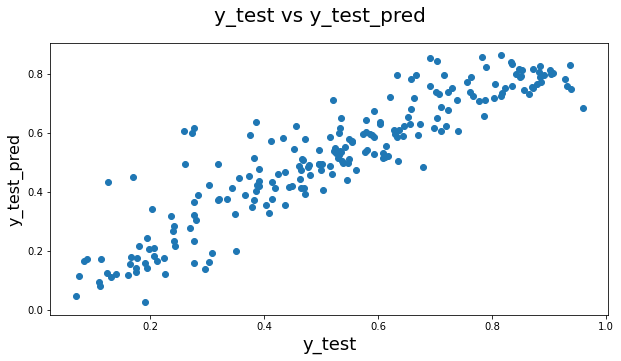

In [53]:
#Visualizing the actual vs predicted values on test data:

fig = plt.figure(figsize = (10,5))
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()


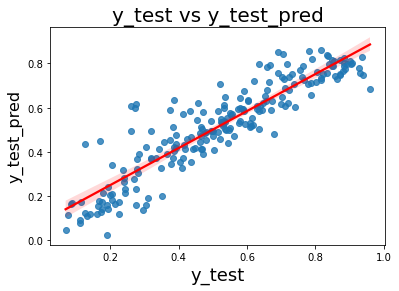

In [54]:
# Visualizing the fit on the test data:
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=99, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

### R-Squared score comparision between test and train data:

In [55]:
print('R- Squared train: ', round(r_score_train,3)  , '      VS  R- Squared test : ', round(r_score_test,3))
print('Adj. R-Squared train:', round(r2_train_adj,3), '   VS  Adj. R-Squared test :', round(r2_test_adj,3))

R- Squared train:  0.823       VS  R- Squared test :  0.829
Adj. R-Squared train: 0.819    VS  Adj. R-Squared test : 0.82


In [56]:
#coefficients of the best fit line:
round(lr_5.params,4)

const             0.2679
yr                0.2320
temp              0.4233
windspeed        -0.1141
dec              -0.0519
july             -0.0675
sep               0.0463
sun               0.0265
light_snowrain   -0.2926
misty            -0.0740
spring           -0.1183
winter            0.0626
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.2679  +  0.2320  \times  yr  +  0.4233  \times  temp  -  0.1141  \times  windspeed  -  0.0519  \times  dec  -  0.0675  \times  july  +  0.0463  \times  sep  +  0.0265  \times  sun  -  0.2926  \times  light snowrain  -  0.0740  \times  misty  -  0.1183  \times  spring  +  0.0626  \times  winter $

### Demand of the bike depends on these features:

- Year
- Temperature
- Windspeed
- Month(Dec, July, Sep)
- Weekday(Sun)
- Weathersit(Light_snowrain, Misty)
- Season(Spring, Winter)

`So it is recommended that the company give utmost importance to these factors while planning to get highest demand.`